In [1]:
from get_datasets.Get_Datasets import get_data_array, get_datasets
from src.Train_Model import train_model
from src.Create_Model import create_model
from src.Evolutionary_Algorithm import create_next_population, create_first_population, select_best_2_model

import re
import os
import random
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('float16')
mixed_precision.set_global_policy(policy)

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = get_data_array(train_dir='chest_xray_new/train',
                                                                test_dir='chest_xray_new/test')

In [4]:
train_ds_rand, val_ds, test_ds = get_datasets(x_train, y_train, x_test, y_test, x_val, y_val)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-01-25 13:26:32.737199: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


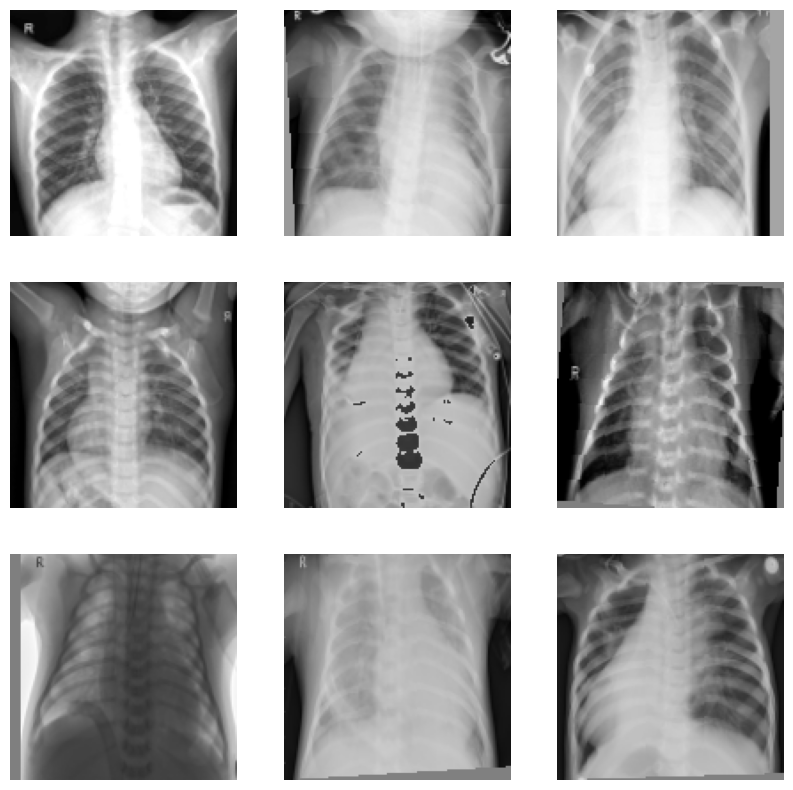

In [6]:
sample_images, _ = next(iter(train_ds_rand))
plt.figure()
for i, image in enumerate(sample_images[:16]):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image.numpy().astype("int"))
    plt.axis("off")

In [10]:
model_array = np.random.randint(0, 2, (9, 18))

In [12]:
test_model = create_model(model_array, num_classes=2, input_shape=(128, 128, 3))
test_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 128, 128, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_124 (Conv2D)            (None, 64, 64, 16)   208         ['rescaling_3[0][0]']            
                                                                                                  
 batch_normalization_63 (BatchN  (None, 64, 64, 16)  64          ['conv2d_124[0][0]']       

In [7]:
def check_model(model):
    for layer in model.layers:
        # Check if the layer is a MultiHeadAttention layer
        if 'MultiHeadAttention' in str(layer):
            # Get the output shape of the layer
            output_shape = layer.output.shape
            # Get the size of the second dimension
            size = output_shape[1]
            if size > 1024:
               return False
    return True

check_model(test_model)


True

In [16]:
test_model, history = train_model(train_ds_rand, val_ds, test_model)

4096
4096
4096
4096
4096
4096
4096
